# ALURA IMERSÃO DADOS

## Aula 01 - Seu primeiro Colab com Python e Pandas

O primeiro passo para qualquer análise normalmente é baixar ou importar as bibliotecas que serão usadas na análise de dados, na célula abaixo eu importo as mais comuns:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Com as bibliotecas importadas, eu preciso fazer a leitura dos dados. No caso dessa imersão os dados foram disponibilizados em formato "csv". Através do método "read_csv" e url de onde o arquivo está salvo, conseguimos acessar os dados.

In [2]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)

Pra verificar se os dados foram carregados corretamente, uso o método "head()" pra dar uma olhadinha nos primeiros 5 itens do nosso dataframe ou tabela ou quadro de dados. 

In [3]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Através do método "shape" eu quis verificar quantas linhas e quantas colunas formam o dataframe.

In [4]:
df.shape

(10008, 8)

Através do método "sample" eu quis verificar aleatoriamente algumas linhas dentro do dataframe.

In [5]:
df.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2268,NaN,Cidade Jardim,São Paulo,1100,4,4,14,R$ 12.800.000
7261,NaN,Vila Monumento,São Paulo,279,3,1,2,R$ 750.000
9868,"Rua Guaonés, 1",Jardim Guedala,São Paulo,965,4,8,10,R$ 4.750.000
2656,NaN,Jardim Cordeiro,São Paulo,850,4,6,6,R$ 7.500.000
6698,"Rua Araporé, 0",Jardim Guedala,São Paulo,860,4,3,8,R$ 6.000.000
2665,NaN,Jardim Paulista,São Paulo,180,3,2,1,R$ 3.000.000
5768,NaN,Jardim Europa,São Paulo,485,4,5,4,R$ 15.000.000
668,Rua Joazeiro,Sumaré,São Paulo,700,3,4,6,R$ 3.600.000
4173,"Rua Artur de Souza Marques, 322",Vila Tramontano,São Paulo,1000,4,6,6,R$ 8.600.000
4919,Rua José de Freitas Guimarães,Pacaembu,São Paulo,400,3,4,4,R$ 2.150.000


Através do método "info" eu quis verificar o tipo de valor em cada uma das colunas. A ideia é saber se alguma das colunas precisa ser modificada.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Do método "sample" e do "info" eu consigo tirar algumas dúvidas/conclusões. Por exemplo, segundo o método "shape" o número de linhas é igual 10008. No entanto, as colunas **["Rua"]** e **["Bairro"]** apresentam respectivamente 6574 e 9996 valores. Além disso, a coluna **["Valor"]** representa o valor do apartamento e infelizmente está em formato OBJECT o que para um dado que numérico precisa ser modificado para int ou float.

Eu escolhi começar trabalhando na Coluna 7. Primeiro, tentando entender que tipo de dado eu tenho nessa coluna. Através do método/função "type".

In [7]:
type(df["Valor"][0])

str

Agora que eu sei que os dados são "str", ou seja do tipo strings que são caracteres de texto. Eu preciso remover o símbolo de cifrão e guardar apenas os dados numéricos. Para remover o símbolo de cifrão, eu usei o método "split". Dessa forma o cifrão sempre vai ficar no índice [0] enquanto o valor do imóvel estarara nó índice [1].

In [8]:
exemplo = df["Valor"][0].split()

In [9]:
exemplo[0]

'R$'

In [10]:
exemplo[1]

'7.000.000'

Ainda falta tranformar a string agora separada em um valor númerico. Consultando na internet eu encontrei algumas formas de fazer isso aplicados ao dataframe. Consultar "astype" e "pd.to_numeric".

In [11]:
df["Valor"]= pd.to_numeric(df["Valor"])

ValueError: ignored

Acabou rolando um erro. E eu imagino seja o problema do símbolo de cifrão. Sendo assim, decidi remover o símbolo de cifrão através do método "split" aplicado numa função lambda. Consultar depois funções lambda

In [12]:
df["Valor"] = df["Valor"].apply(lambda x: x.split()[1])

In [13]:
df["Valor"]

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: Valor, Length: 10008, dtype: object

In [14]:
df["Valor"]= pd.to_numeric(df["Valor"])

ValueError: ignored

Ainda não rolou :(
  
  Depois voltamos nisso, bora continuar a aula... ;)

Através do índice [6522] é possível acessar o nome do Bairro separadamente.

In [15]:
df["Bairro"][6522]

'Vila Paulo Silas'

Através do método "mean()" é possível calcular a média para uma Serie numérica. Seguindo o exemplo da Aula 01. Calculei a média da "Metragem".

In [16]:
df.Metragem.mean()

442.30065947242207

Para não se confundir "df.Metragem.mean()" com algum método "metragem" que poderia ser desenvolvido dentro do programa. É usual utilizarmos a notação abaixo:

In [17]:
df["Metragem"].mean()

442.30065947242207

É possível também realizar operações lógicas para separar fatias dentro do dataframe. Por exemplo, se quisermos saber qual o número de linhas em que o Bairro é igual a Vila Mariana podemos fazer da seguinte forma:

In [18]:
sum(df["Bairro"]=="Vila Mariana")

184

In [19]:
vila_mariana = df["Bairro"]=="Vila Mariana"

In [20]:
df_vila_mariana = df[vila_mariana]
df_vila_mariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,1.500.000


E assim dá pra saber a média da Metragem específica para o Bairro Vila Mariana.

In [21]:
df_vila_mariana["Metragem"].mean()

233.6195652173913

Com o método "value_counts()" é possível saber quantos imóveis em cada Bairro.

In [22]:
df["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

Através dos métodos "value_counts()", "head()" e "plot.bar()" criamos um gráfico de barras dos primeiros 10 bairros com mais imóveis e a quantidade de imóveis nesse Bairro.

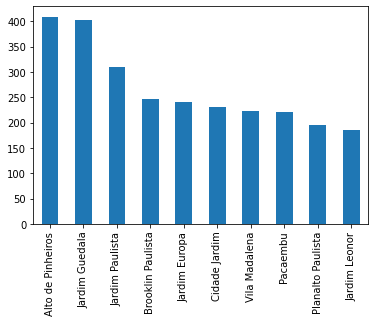

In [23]:
n_imoveis_bairro = df["Bairro"].value_counts().head(10).plot.bar()

## Desafios desta aula

1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)

In [24]:
df.groupby("Bairro")[["Metragem"]].mean()

,Metragem
Bairro,
Aclimação,253.056818
Alto da Boa Vista,418.875000
Alto da Lapa,294.337209
Alto da Mooca,270.050000
Alto de Pinheiros,433.444988
...,...
Vila Água Funda,152.200000
Água Branca,191.000000
Água Fria,165.416667


2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

In [31]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [46]:
df["Bairro"][0]

'Planalto Paulista'

In [41]:
df.loc[2][1]

'Jardim Reimberg'

In [50]:
df.iloc[2][1]

'Jardim Reimberg'

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)

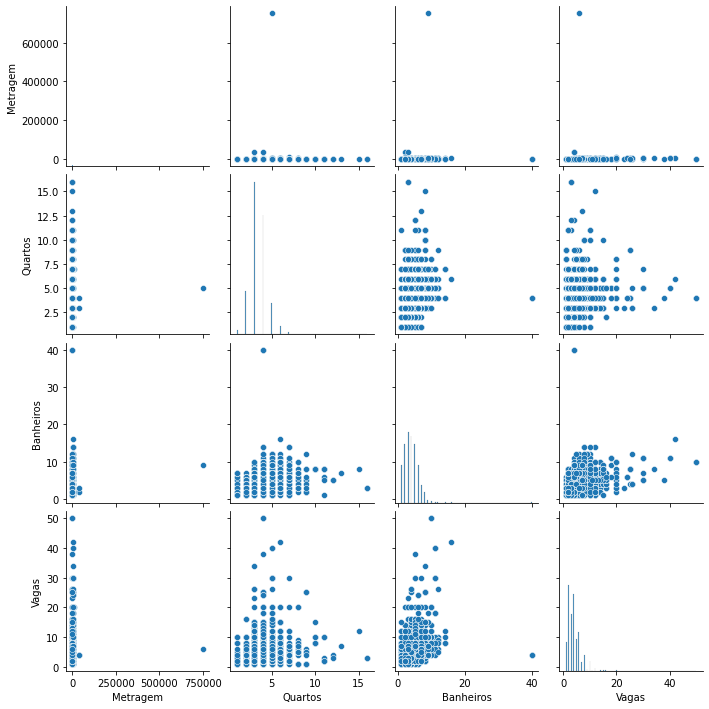

In [86]:
sns.pairplot(df)

Existe um valor de "Metragem" com o valor de 700000 que possivelmente é um valor incorreto.

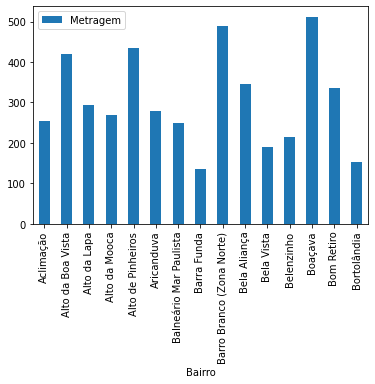

In [125]:
df.groupby("Bairro")[["Metragem"]].mean().head(15).plot.bar()

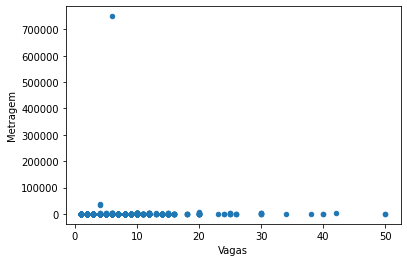

In [93]:
df.plot.scatter(x="Vagas", y="Vagas")

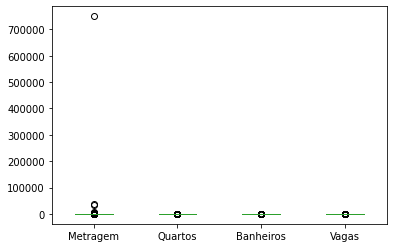

In [95]:
df.plot.box()

4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)

In [25]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [27]:
df[["Metragem","Quartos","Banheiros", "Vagas"]].median()

Metragem     290.0
Quartos        3.0
Banheiros      4.0
Vagas          4.0
dtype: float64

5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [110]:
sem_rua = pd.isnull(df["Rua"])
df[sem_rua]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,9.500.000
